#### Assignment: Create database and insert data from given CSV files.
https://drive.google.com/drive/folders/1NRKKbAolyFxNuJwn1TW2dRGMK3Z5oDGE?usp=sharing

## Hands-on Lab: String Patterns, Sorting and Grouping in MySQL

After completing this lab, you will be able to:

1. Filter the output of a SELECT query by using string patterns, ranges, or sets of values.
2. Sort the result set in either ascending or descending order in accordance with a pre-determined column.
3. Group the outcomes of a query based on a selected parameter to further refine the response.

In [ ]:
import mysql.connector

cn=mysql.connector.connect(host='localhost',user='root',password='Vibha.7522')
cursor=cn.cursor()

### String Patterns
You can use string patterns to filter the response of a query. Let's look at the following example:

Say you need to retrieve the first names F_NAME and last names L_NAME of all employees who live in Elgin, IL. You can use the LIKE operator to retrieve strings that contain the said text. The code will look as shown below.




In [ ]:
cursor.execute('use HR_Database')

In [ ]:
cursor.execute('SELECT F_NAME, L_NAME FROM HR_database.EMPLOYEES WHERE ADDRESS LIKE "%Elgin,IL%"')
cursor.fetchall()

In [ ]:
cursor.execute('SELECT F_NAME, L_NAME,ADDRESS FROM HR_database.EMPLOYEES WHERE ADDRESS LIKE "%BERR_%"')
cursor.fetchall()

Now assume that you want to identify the employees who were born during the 70s. The query above can be modified to:




In [ ]:
cursor.execute("SELECT F_NAME, L_NAME FROM EMPLOYEES WHERE B_DATE LIKE '197%'")
cursor.fetchall()

Note that in the first example, % sign is used both before and after the required text. This is to indicate, that the address string can have more characters, both before and after, the required text.

In the second example, since the date of birth in Eployees records starts with the birth year, the % sign is applied after 197%, indicating that the birth year can be anything between 1970 to 1979. Further the % sign also allows any possible date throughout the selected years.

Consider a more specific example. Let us retrieve all employee records in department 5 where salary is between 60000 and 70000. The query that will be used is

In [ ]:
cursor.execute("SELECT * FROM HR_Database.EMPLOYEES WHERE (SALARY BETWEEN 60000 AND 70000) AND DEP_ID = 5")
cursor.fetchall()

### Sorting
You can sort the retrieved entries on the basis of one or more parameters.

First, assume that you hvae to retrieve a list of employees ordered by department ID.

Sorting is done using the ORDER BY clause in your SQL query. By default, the ORDER BY clause sorts the records in ascending order.

In [ ]:
cursor.execute('SELECT F_NAME, L_NAME, DEP_ID FROM HR_Database.EMPLOYEES ORDER BY DEP_ID DESC')
cursor.fetchall()

Now, get the output of the same query in descending order of department ID, and within each deaprtment, the records should be ordered in descending alphabetical order by last name. For descending order, you can make use of the DESC clause.

In [ ]:
cursor.execute('SELECT F_NAME, L_NAME, DEP_ID FROM HR_Database.EMPLOYEES ORDER BY DEP_ID DESC, L_NAME DESC')
cursor.fetchall()

### Grouping
In this exercise, you will go through some SQL problems on Grouping.

NOTE: The SQL problems in this exercise involve usage of SQL Aggregate functions AVG and COUNT. COUNT has been covered earlier. AVG is a function that can be used to calculate the Average or Mean of all values of a specified column in the result set. For example, to retrieve the average salary for all employees in the EMPLOYEES table, issue the query: SELECT AVG(SALARY) FROM EMPLOYEES;.

A good example of grouping would be if For each department ID, we wish to retrieve the number of employees in the department.



In [ ]:
cursor.execute("SELECT DEP_ID, COUNT(*) FROM HR_Database.EMPLOYEES GROUP BY DEP_ID")
cursor.fetchall()

Now, for each department, retrieve the number of employees in the department and the average employee salary in the department. For this, you can use COUNT(*) to retrieve the total count of a records, and AVG() function to compute average salaries, and then GROUP BY.

In [ ]:
cursor.execute("SELECT DEP_ID, COUNT(*), AVG(SALARY) FROM EMPLOYEES GROUP BY DEP_ID")
cursor.fetchall()

You can refine your resultset by using appropriate labels for the columns of data retrieved. Label the computed columns in the result set of the last problem as NUM_EMPLOYEES and AVG_SALARY.

In [ ]:
cursor.execute('SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY" FROM EMPLOYEES GROUP BY DEP_ID')
cursor.fetchall()

You can also combine the usage of GROUP BY and ORDER BY statements to sort the output of each group in accordance with a specific parameter. It is important to note that in such a case, ORDER BY clause muct be used after the GROUP BY clause. For example, we can sort the result of the previous query by average salary. The SQL query would thus become

In [ ]:
cursor.execute('SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY" FROM EMPLOYEES GROUP BY DEP_ID ORDER BY AVG_SALARY DESC')
cursor.fetchall()

In case you need to filter a grouped response, you have to use the HAVING clause. In the previous example, if we wish to limit the result to departments with fewer than 4 employees, We will have to use HAVING after the GROUP BY, and use the count() function in the HAVING clause instead of the column label.

In [ ]:
cursor.execute('SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY" FROM EMPLOYEES GROUP BY DEP_ID HAVING NUM_EMPLOYEES < 4 ORDER BY AVG_SALARY')
cursor.fetchall()

In [ ]:
cursor.execute('SELECT * FROM EMPLOYEES HAVING salary<60000')
cursor.fetchall()

In [ ]:
cursor.execute('SELECT * FROM EMPLOYEES where salary<60000')
cursor.fetchall()

## Practice Questions

1. Retrieve the list of all employees, first and last names, whose first names start with ‘S’.



In [ ]:
cursor.execute("SELECT F_NAME, L_NAME FROM HR_DATABASE.EMPLOYEES WHERE F_NAME LIKE 'S%'")
cursor.fetchall()

2. Arrange all the records of the EMPLOYEES table in ascending order of the date of BIRTH.

In [ ]:
cursor.execute("SELECT * FROM HR_DATABASE.EMPLOYEES ORDER BY B_DATE")
cursor.fetchall()

3. Group the records in terms of the department IDs and filter them of ones that have average salary more than or equal to 60000. Display the department ID and the average salary.

In [ ]:
cursor.execute("SELECT DEP_ID, AVG(SALARY) AS AVG_SALARY FROM HR_DATABASE.EMPLOYEES GROUP BY DEP_ID HAVING AVG(SALARY)>=60000")
cursor.fetchall()

4. For the problem above, sort the results for each group in descending order of average salary.

In [ ]:
cursor.execute("SELECT DEP_ID, AVG(SALARY) AS AVG_SALARY FROM HR_DATABASE.EMPLOYEES GROUP BY DEP_ID HAVING AVG(SALARY)>=60000 ORDER BY AVG(SALARY) DESC")
cursor.fetchall()

## HAVING:

In [ ]:
cursor.execute("use imdb")

Print years which have >1000 movies in our DB.

In [ ]:
cursor.execute("SELECT year, COUNT(year) as year_count FROM movies GROUP BY year HAVING year_count>1000 order by year desc")
cursor.fetchall()

Order of execution:
1. GROUP BY to create groups
2. Apply the AGGREGATE FUNCTION
3. Apply HAVING condition. (often used along with GROUP BY, not mandatory.

In [ ]:
cursor.execute("SELECT name, year from movies having year>2000")
cursor.fetchall()

#### Having vs Where
1. WHERE is applied on individual rows while HAVING is applied on groups.
2. HAVING is applied after grouping while WHRER is used before grouping.

In [ ]:
cursor.execute("SELECT year, count(year) year_count from movies where rankscore>9 group by year having year_count>20")
cursor.fetchall()

## JOIN

### Inner join
Combine data in multiple tables.
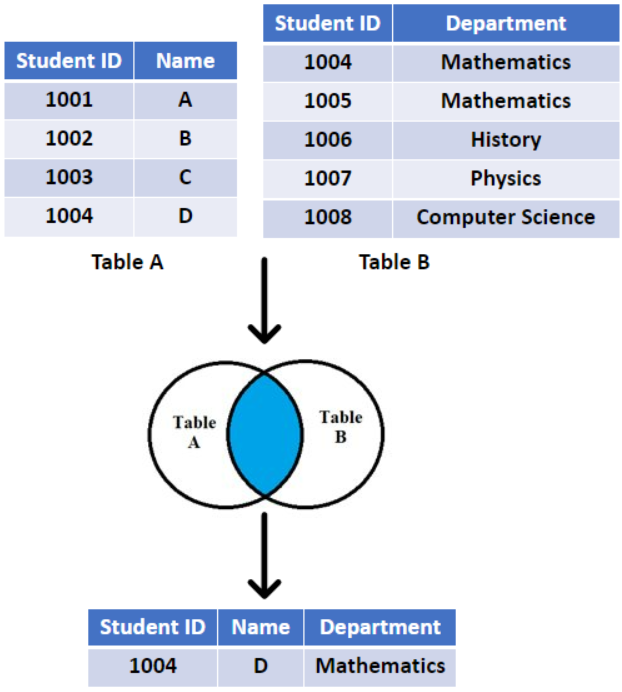

In [ ]:
cursor.execute("use imdb")
cursor.execute("describe imdb.movies")
cursor.fetchall()

In [ ]:
cursor.execute("describe imdb.movies_genres")
cursor.fetchall()

For each movie, print name and the genres

In [ ]:
cursor.execute("SELECT m.name, g.genre FROM movies m JOIN movies_genres g ON m.id=g.movie_id LIMIT 20")
cursor.fetchall()

### Natural Join
A join where we have the same column-names across two tables.

#### T1: C1, C2
#### T2: C1, C3, C4

##### SELECT * FROM T1 JOIN T2;
##### SELECT * FROM T1 Join T2 USING (C1);

returns C1, C2, C3, C4. no need to use the keyword "ON".

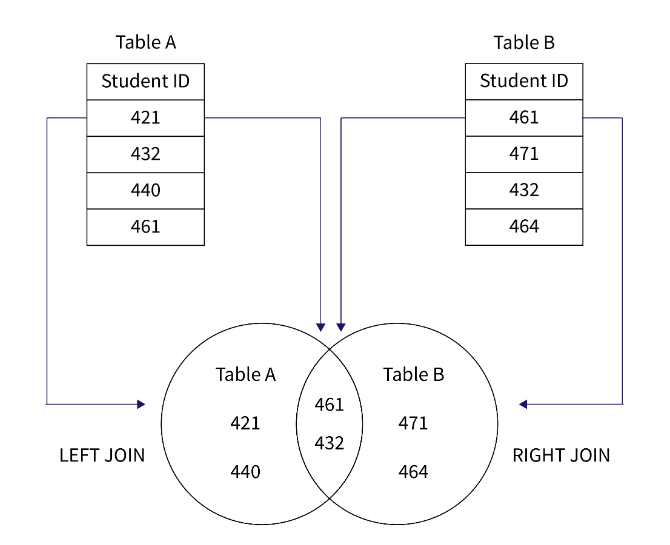
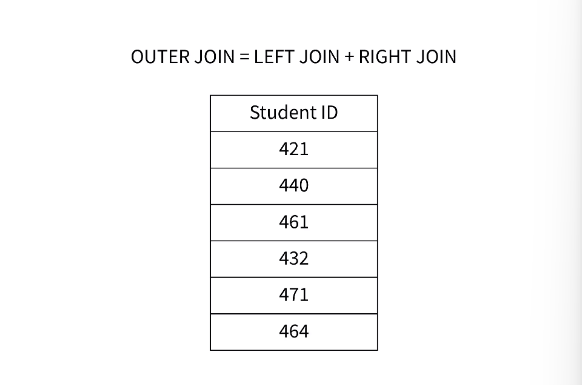

In [ ]:
# LEFT JOIN or LEFT OUTER JOIN
cursor.execute("SELECT m.name, g.genre FROM imdb.movies m LEFT JOIN imdb.movies_genres g ON m.id=g.movie_id LIMIT 20")
cursor.fetchall()

In [ ]:
# RIGHT JOIN or RIGHT OUTER JOIN
cursor.execute("SELECT m.name, g.genre FROM imdb.movies m RIGHT JOIN imdb.movies_genres g ON m.id=g.movie_id LIMIT 20")
cursor.fetchall()

We do not have a full join or full outer join in MySQL. But instead, we will emulate them using a combination of LEFT and RIGHT JOINS and the UNION query.

SELECT * FROM t1
LEFT JOIN t2 ON t1.id = t2.id
UNION
SELECT * FROM t1
RIGHT JOIN t2 ON t1.id = t2.id

In [ ]:
# FULL JOIN or FULL OUTER JOIN
cursor.execute("SELECT m.name, g.genre FROM imdb.movies m LEFT OUTER JOIN imdb.movies_genres g ON m.id=g.movie_id UNION SELECT m.name, g.genre FROM imdb.movies m RIGHT OUTER JOIN imdb.movies_genres g ON m.id=g.movie_id LIMIT 20")
cursor.fetchall()

3-way joins and k-way joins

In [ ]:
cursor.execute("SELECT a.first_name, a.last_name FROM imdb.actors a JOIN imdb.roles r ON a.id=r.actor_id JOIN imdb.movies m on m.id=r.movie_id AND m.name='Officer 444'")
cursor.fetchall()

In [ ]:
cursor.execute("describe imdb.movies_genres")
cursor.fetchall()

## Sub-Queries or Nested Queries or Inner Queries

List all actors in the movie Schindler's List

#### Syntax:
SELECT column_name [, column_name ]
FROM table
WHERE column_name OPERATOR
    (SELECT column_name [, column_name ]
    FROM table1
    [WHERE])
    
First the innermost query is executed and then the outer query is executed using the output values in the inner query.

In [ ]:
SELECT first_name, last_name FROM actors WHERE id IN
    (SELECT actor_id FROM roles WHERE movie_id IN
         (SELECT id FROM movies WHERE name='Schindler\'s List')
    )

In [ ]:
cursor.execute("SELECT first_name, last_name FROM actors WHERE id IN (SELECT actor_id FROM roles WHERE movie_id IN (SELECT id FROM movies WHERE name='Schindler''s List'))")
cursor.fetchall()

#### same task we can do by using JOIN

SELECT actors.first_name, actors.last_name
FROM actors
INNER JOIN roles ON actors.id = roles.actor_id
INNER JOIN movies ON roles.movie_id = movies.id
WHERE movies.name = 'Schindler''s List';


Retrive all movies whose rankscore is same as the maximum rankscore.

ALL operator returns TRUE if all of the subquery values meet the condition.

In [ ]:
SELECT * FROM imdb.movies WHERE rankscore>=ALL
(SELECT MAX(imdb.rankscore) FROM movies)

### Aggregate Functions

Aggregate functions are used to perform calculations on a set of values and return a single result. Some of the most commonly used aggregate functions in SQL include −

COUNT() - Returns the number of rows in a table or the number of non-NULL values in a column

SUM() - Returns the sum of all non-NULL values in a column

AVG() - Returns the average of all non-NULL values in a column

MIN() - Returns the minimum value in a column

MAX() - Returns the maximum value in a column

### Scalar Functions

Scalar functions are used to perform calculations on a single value and return a single result. Some examples of scalar functions in SQL include −

LENGTH() - Returns the number of characters in a string

UPPER() - Converts a string to uppercase

LOWER() - Converts a string to lowercase

CONCAT() - Concatenates two or more strings together

ROUND() - Rounds a number to a specified number of decimal places

### MySQL Date Data Types

MySQL comes with the following data types for storing a date or a date/time value in the database:

DATE - format YYYY-MM-DD
DATETIME - format: YYYY-MM-DD HH:MI:SS
TIMESTAMP - format: YYYY-MM-DD HH:MI:SS
YEAR - format YYYY or YY